## BUSINESS PROBLEM

The purpose of this study is build different linear models by using Hitters dataset. 

Different linear models were developed and tuned to find out the best performing model having the lowest RMSE score.

A Hitters data having 322 observations of major baseball league players is used for this study.

Variables of this dataset are as follows;

+ AtBat: Number of times at bat in 1986
+ Hits: Number of hits in 1986
+ HmRun: Number of home runs in 1986
+ Runs: Number of runs in 1986
+ RBI: Number of runs batted in in 1986
+ Walks: Number of walks in 1986
+ Years: Number of years in the major leagues
+ CAtBat: Number of times at bat during his career
+ CHits: Number of hits during his career
+ CHmRun: Number of home runs during his career
+ CRuns: Number of runs during his career
+ CRBI: Number of runs batted in during his career
+ CWalks: Number of walks during his career
+ League: A factor with levels A and N indicating player's league at the end of 1986
+ Division: A factor with levels E and W indicating player's division at the end of 1986
+ PutOuts: Number of put outs in 1986
+ Assists: Number of assists in 1986
+ Errors: Number of errors in 1986
+ Salary: 1987 annual salary on opening day in thousands of dollars
+ NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987 

## IMPORTING & INSTALLING REQUIRED LIBRARIES

In [74]:

import numpy as np
import pandas as pd 
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from math import sqrt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings


## EXPLORATORY DATA ANALYSIS

In [75]:
df = pd.read_csv('Hitters.csv') 
print(df.shape)
df.head()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [77]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [78]:
variable_with_null = [var for var in df.columns if df[var].isnull().mean() > 0]
variable_with_null

['Salary']

In [79]:
df_null = df[variable_with_null].isnull().mean()

df_null = pd.DataFrame(df_null.reset_index())

df_null.columns = ['variable', 'null_percentage']

df_null.sort_values(by='null_percentage', ascending=False, inplace=True)

df_null

,variable,null_percentage
0,Salary,0.18323


In [80]:
df.groupby(["Division", "League"])["Salary"].mean()

Division  League
E         A         670.849559
          N         572.348131
W         A         418.593901
          N         487.259270
Name: Salary, dtype: float64

In [81]:
df["Salary"] = df["Salary"].fillna(df.groupby(["Division", "League"])["Salary"].transform("mean"))

In [82]:
variable_with_null = [var for var in df.columns if df[var].isnull().mean() > 0]
variable_with_null 

[]

In [83]:
df.describe([0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
AtBat,322.0,380.928571,153.404981,16.0,161.00,194.1,255.25,379.5,512.00,584.9,609.90,658.59,687.0
Hits,322.0,101.024845,46.454741,1.0,39.00,45.1,64.00,96.0,137.00,163.0,174.00,210.79,238.0
HmRun,322.0,10.770186,8.709037,0.0,0.00,1.0,4.00,8.0,16.00,24.0,28.95,33.00,40.0
Runs,322.0,50.909938,26.024095,0.0,17.00,20.1,30.25,48.0,69.00,89.0,94.00,107.79,130.0
RBI,322.0,48.027950,26.166895,0.0,14.00,19.0,28.00,44.0,64.75,86.0,96.00,112.37,121.0
Walks,322.0,38.742236,21.639327,0.0,11.05,15.0,22.00,35.0,53.00,69.9,78.00,93.58,105.0
Years,322.0,7.444099,4.926087,1.0,1.00,2.0,4.00,6.0,11.00,15.0,17.00,19.79,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,216.50,342.2,816.75,1928.0,3924.25,6123.4,7125.60,8749.97,14053.0
CHits,322.0,717.571429,654.472627,4.0,54.00,86.0,209.00,508.0,1059.25,1659.6,2017.15,2500.34,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,2.00,4.0,14.00,37.5,90.00,194.9,265.65,373.12,548.0


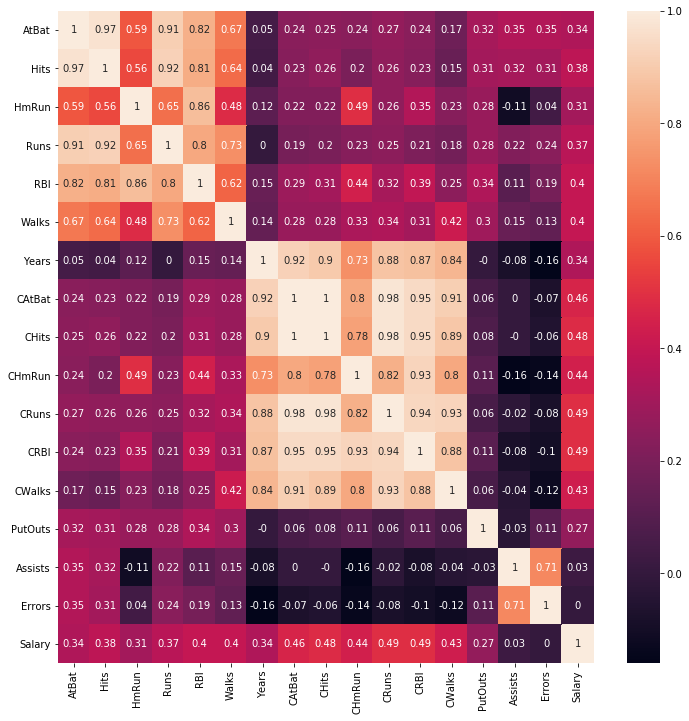

In [84]:
correlation_matrix = df.corr().round(2) 
figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True);

In [85]:
## Errors and Assists Variables are dropped from the dataset since these two variables have very low correlation (lower than .05) with salary variable 
df=df.drop(['Errors', 'Assists'], axis=1)


In [86]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,670.849559,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,91.500000,N


In [87]:
le = LabelEncoder()
df['League'] = le.fit_transform(df['League'])
df['Division'] = le.fit_transform(df['Division'])
df['NewLeague'] = le.fit_transform(df['NewLeague'])

In [88]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,670.849559,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,475.000000,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,480.000000,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,500.000000,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,91.500000,1


In [89]:

clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df)
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]


array([-4.74135213, -3.53623769, -2.63930782, -2.59928427, -2.1095333 ,
       -2.09784571, -1.95415103, -1.91500703, -1.88940017, -1.8043389 ,
       -1.79295235, -1.76155854, -1.703159  , -1.70256621, -1.65524884,
       -1.60820374, -1.52797743, -1.52137379, -1.52094928, -1.51362561])

In [90]:
threshold=np.sort(df_scores)[14]
print(threshold)
df=df.loc[df_scores > threshold]
df=df.reset_index(drop=True)



-1.6552488430708494


In [91]:
df.shape

(307, 18)

In [92]:
# Normalization
df_X = df.drop(["Salary","League","Division","NewLeague"], axis=1)
scaled_columns = preprocessing.normalize(df_X)
scaled_columns=pd.DataFrame(scaled_columns, columns=df_X.columns)


In [93]:

cat_df=pd.concat([df.loc[:,"League":"Division"],df["NewLeague"]], axis=1)
df= pd.concat([scaled_columns,cat_df,df["Salary"]], axis=1)
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,League,Division,NewLeague,Salary
0,0.601216,0.128128,0.009856,0.065707,0.049280,0.036139,0.009856,0.660352,0.137984,0.009856,0.065707,0.052565,0.036139,0.387670,0,1,0,418.593901
1,0.066351,0.018457,0.002336,0.010397,0.008761,0.008528,0.001752,0.942466,0.265521,0.020676,0.122072,0.115998,0.085509,0.012266,1,1,1,775.000000
2,0.349428,0.084598,0.003678,0.044138,0.014713,0.027586,0.009195,0.880927,0.187588,0.009195,0.119541,0.042299,0.071725,0.187588,0,1,0,175.000000
3,0.072095,0.018422,0.001063,0.010097,0.007617,0.011514,0.002126,0.926967,0.261811,0.017714,0.113900,0.116557,0.115672,0.161551,0,1,0,418.593901
4,0.159389,0.040161,0.010040,0.020081,0.027611,0.017570,0.010040,0.912411,0.225906,0.030121,0.084087,0.102913,0.070282,0.253517,1,1,1,135.000000


## MODEL DEVELOPMENTS

In [94]:
y=df["Salary"]
X=df.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)
print(X_train.shape); print(X_test.shape)



(245, 17)
(62, 17)


### MULTIPLE LINEAR REGRESSION

In [95]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_lin_reg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_lin_reg_rmse



267.300608245948

### RIDGE REGRESSION

#### MODEL DEVELOPMENT

In [96]:
rid_reg = Ridge()
model = rid_reg.fit(X_train, y_train)
y_pred = model.predict(X_test)
df_rid_reg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_rid_reg_rmse 


317.49453556639605

#### MODEL TUNING

In [97]:
alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
rid_reg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
rid_reg_cv.fit(X_train, y_train)
rid_reg_cv.alpha_


0.01

In [98]:
rid_reg_tuned = Ridge(alpha = rid_reg_cv.alpha_).fit(X_train,y_train)
y_pred = rid_reg_tuned.predict(X_test)
df_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridge_tuned_rmse



266.9779465997936

### LASSO REGRESSION

#### MODEL DEVELOPMENT

In [99]:
lasso_reg = Lasso()
model = lasso_reg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_lasso_reg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_lasso_reg_rmse


290.6416295401277

#### MODEL TUNING

In [100]:
alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_


0.01

In [101]:
lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_lasso_tuned_rmse


267.1250464764915

### ELASTIC NET REGRESSION

#### MODEL DEVELOPMENT

In [102]:
enet = ElasticNet()
model = enet.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_rmse


376.34021892195324

#### MODEL TUNING

In [103]:

enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}

enet_model = ElasticNet().fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_



{'alpha': 0.1, 'l1_ratio': 1}

In [104]:
enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_tuned_rmse


265.73855167546634

## REPORT & SUMMARY

In [105]:
Summary_df = pd.DataFrame({"CONDITIONS":["Missing Salary replaced by league and division mean, normalized"],
                              "LINEAR":[df_lin_reg_rmse],
                               "RIDGE":[df_rid_reg_rmse],
                              "RIDGE TUNED":[df_ridge_tuned_rmse],
                              "LASSO":[df_lasso_reg_rmse],
                              "LASSO TUNED":[df_lasso_tuned_rmse],                              
                              "ELASTIC NET":[df_enet_rmse],
                              "ELASTIC NET TUNED":[df_enet_tuned_rmse]})

Summary_df.head().T

,0
CONDITIONS,Missing Salary replaced by league and division...
LINEAR,267.301
RIDGE,317.495
RIDGE TUNED,266.978
LASSO,290.642
LASSO TUNED,267.125
ELASTIC NET,376.34
ELASTIC NET TUNED,265.739


Four different regression models were performed to examine how each model predicts our target variable which is salary. 

After model development, all models were tried to be tuned based on the best parameters found. 

Cross validation analysis was performed for each model to find the optimal alpha value. 

For this dataset, the first developed Linear Regression model is performing the best since its RMSE score is the lowest (267.301). 

After model tuning, Elastic Net Regression is performing the best with a rmse value of 265.739 
